In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
#import geopandas as gpd
import folium

In [3]:
# 따릉이 정류소 데이터
station = pd.read_csv('station(21.01.31).csv')

# 따릉이 이용 데이터
# colmun : [자전거번호, start_time, 대여 대여소번호, 대여 대여소명, 대여거치대, end_time,반납대여소번호,반납대여소명, 반납거치대, using_time, distance]
# 필요없는 column 버릴까 생각중
use = np.load('selected_data.npz', allow_pickle = True)
use = use['arr_0']

In [4]:
# 정류소 nan
a = 0
l = []
for i in range(2154):
    if np.isnan(station.iloc[:,4][i]):
        l.append(station.iloc[:,0][i])
        a += 1
print(a)
l

112


[486,
 3415,
 4702,
 4710,
 4711,
 3013,
 4761,
 4762,
 4772,
 4774,
 4775,
 4776,
 4778,
 4784,
 4785,
 4791,
 4602,
 4604,
 4605,
 4616,
 4617,
 4618,
 4627,
 583,
 3600,
 4353,
 4360,
 4362,
 3587,
 3588,
 642,
 4102,
 4103,
 4104,
 4105,
 4107,
 4108,
 4110,
 4112,
 4113,
 4116,
 4117,
 4121,
 4122,
 4123,
 1382,
 1571,
 1572,
 1573,
 1574,
 3703,
 3707,
 3711,
 3714,
 1713,
 1770,
 4076,
 4652,
 4653,
 4654,
 4205,
 4206,
 4210,
 710,
 2743,
 2744,
 2745,
 2746,
 3753,
 3756,
 3760,
 3761,
 3763,
 3765,
 3766,
 3792,
 3767,
 3772,
 3775,
 3776,
 3778,
 3779,
 3780,
 3781,
 3782,
 3784,
 3794,
 3786,
 3787,
 3788,
 3789,
 3795,
 3796,
 3797,
 3798,
 3769,
 3902,
 3903,
 3904,
 3905,
 3906,
 4556,
 4557,
 3802,
 2547,
 2548,
 2549,
 2550,
 1267,
 1268,
 2658,
 2659]

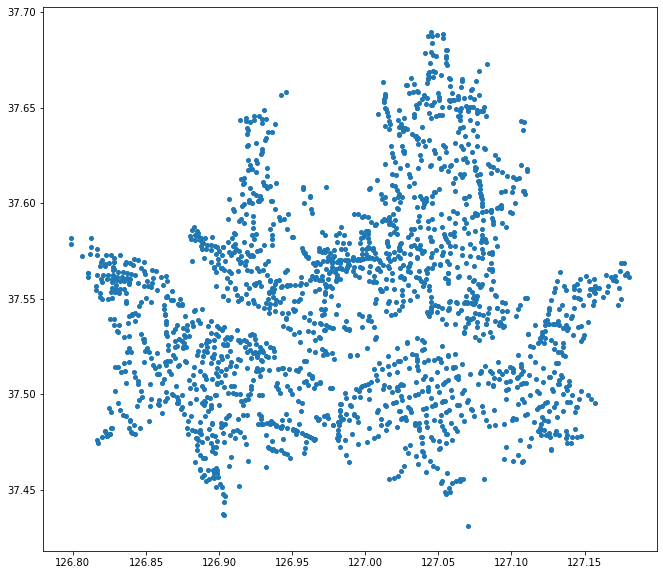

In [5]:
# plt 정류소 단순 위치
plt.figure(figsize = (11, 10))
plt.plot(station.iloc[:, 5], station.iloc[:, 4], 'o', markersize = 4)

In [6]:
def follow(start, end):
    sx = station.loc[start, 'longitude']
    sy = station.loc[start, 'latitude']
    ex = station.loc[end, 'longitude'] - sx
    ey = station.loc[end, 'latitude'] - sy

    return sx, sy, ex, ey

In [51]:
plt.figure(figsize = (11, 10))
plt.plot(station.iloc[:, 5], station.iloc[:, 4], 'o', markersize = 2)

for start, end in zip(use[:3000, 2], use[:3000, 6]):
    x1, y1, x2, y2 = follow(start, end)

    plt.arrow(x1, y1, x2, y2, color = 'r')

IndexError: single positional indexer is out-of-bounds

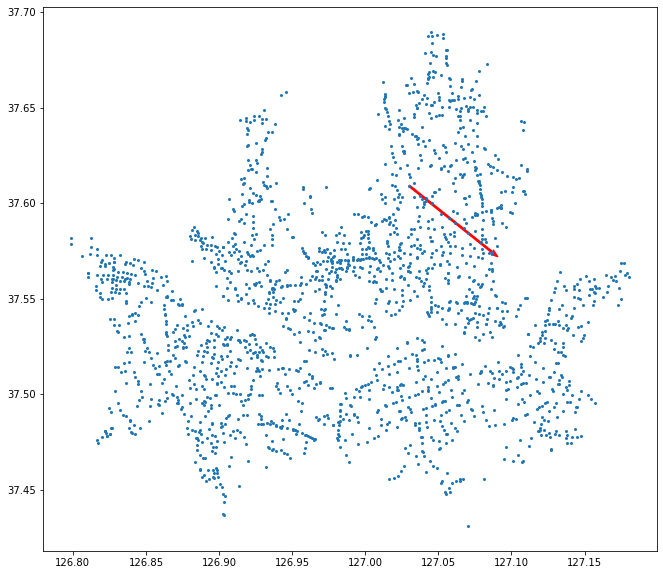

In [18]:
# arrow example
plt.figure(figsize = (11, 10))
plt.plot(station.iloc[:, 5], station.iloc[:, 4], 'o', markersize = 2)

x1, y1, x2, y2 = follow(600, 500)

plt.arrow(x1, y1, x2, y2, color = 'r')